<a href="https://colab.research.google.com/github/ipeirotis/sql_autograding/blob/main/Evaluation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth

# Login using the account that has access to the Google project
# in order to access the resources for the project
auth.authenticate_user()

In [3]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import gcsfs

fs = gcsfs.GCSFileSystem(project="sql_autograding")
with fs.open("gs://sql_autograding/zero_shot_completion_final.csv") as f:
    data = pd.read_csv(f)

In [5]:
data = data.drop(columns='Unnamed: 0')
data.head()

,QuestionID,SubmittedAnswer,StudentID,Score,HomeWork,Question,Database,AnswerKey,schema,full_score,0_mp,4_0_answer,4_0_grade,4_0_feedback,3_0_answer,3_0_grade,3_0_feedback
0,61,"SELECT ShipCountry, AVG(Freight) as AverageFre...",ky2449,7.5,Final Exam,We want to identify the ship countries with th...,northwind,"SELECT ShipCountry, ROUND(AVG(Freight),2) AS A...","[{'Categories': ['CategoryID', 'CategoryName',...",7.5,\n a. We are working with the northwind...,Grade: 10/10\n\nFeedback: Great job! Your quer...,10,Great job! Your query correctly identifies the...,Grade: 8/10\n\nFeedback: \n- The student's que...,8,\n- The student's query is correct and produce...
1,22,select count(*) from track;,sv2230,1.0,Assignment 4: Aggregations,Count the number of tracks in the database,music,SELECT COUNT(*) AS cnt FROM track,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music dat...,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query is correct and it wi...,Grade: 8/10\n\nFeedback: \nGreat job on correc...,8,\nGreat job on correctly identifying the table...
2,49,# 7. Using the passengers_per_airport table fr...,jj3446,1.0,Assignment 6: Window queries,Using the passengers_per_airport table from th...,flights,"SELECT origin, State, total_passengers , RANK(...","[{'airports': ['airport', 'state', 'state_name...",4.0,\n a. We are working with the flights d...,Grade: 9/10\n\nFeedback: Your answer is almost...,9,Your answer is almost perfect. You have correc...,Grade: 8/10\n\nFeedback: \n- The query provide...,8,\n- The query provided by the student is corre...
3,6,SELECT * from track;,fr882,0.0,Assignment 2B: Selection Queries,Show all the tracks.,music,SELECT * FROM track,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music dat...,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query is correct and it wi...,Grade: 9/10\nFeedback: Great job! Your answer ...,9,Great job! Your answer is correct and retrieve...
4,16,"use music; select t.track_name, ar.artist_n...",rrk6921,1.0,Assignment 3: Joins,"List all the track names, the corresponding al...",music,"SELECT track_name, artist_name, album_name FRO...","[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music dat...,Grade: 10/10\n\nFeedback: Excellent job! Your ...,10,Excellent job! Your SQL query correctly retrie...,Grade: 8/10\n\nFeedback: \n- The student's que...,8,\n- The student's query successfully retrieves...


In [6]:
data['4_0_grade'].value_counts()

10                                                                                                                429
9                                                                                                                 154
8                                                                                                                  85
7                                                                                                                  44
6                                                                                                                  26
0                                                                                                                  13
4                                                                                                                  13
3                                                                                                                  12
2                                                       

In [7]:
data['3_0_grade'].value_counts()

8    474
7    184
9     79
6     49
4      7
5      7
Name: 3_0_grade, dtype: int64

In [8]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [9]:
data = data[data['4_0_grade'].apply(is_float)]
data.shape

(797, 17)

## Evaluation begins (800 zero-shot rows)

In [10]:
df = data[['HomeWork', 'QuestionID', 'Database', 'full_score', 'Score', '4_0_grade', '3_0_grade']]
df.head()

,HomeWork,QuestionID,Database,full_score,Score,4_0_grade,3_0_grade
0,Final Exam,61,northwind,7.5,7.5,10,8
1,Assignment 4: Aggregations,22,music,1.0,1.0,10,8
2,Assignment 6: Window queries,49,flights,4.0,1.0,9,8
3,Assignment 2B: Selection Queries,6,music,1.0,0.0,10,9
4,Assignment 3: Joins,16,music,1.0,1.0,10,8


In [11]:
# scale gpt score
df['4_0_grade'] = (df['4_0_grade'].astype(float))*(df['full_score'].astype(float))/10
df['3_0_grade'] = (df['3_0_grade'].astype(float))*(df['full_score'].astype(float))/10
df.head()

<ipython-input-11-ca598a37f36c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4_0_grade'] = (df['4_0_grade'].astype(float))*(df['full_score'].astype(float))/10
<ipython-input-11-ca598a37f36c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3_0_grade'] = (df['3_0_grade'].astype(float))*(df['full_score'].astype(float))/10


,HomeWork,QuestionID,Database,full_score,Score,4_0_grade,3_0_grade
0,Final Exam,61,northwind,7.5,7.5,7.5,6.0
1,Assignment 4: Aggregations,22,music,1.0,1.0,1.0,0.8
2,Assignment 6: Window queries,49,flights,4.0,1.0,3.6,3.2
3,Assignment 2B: Selection Queries,6,music,1.0,0.0,1.0,0.9
4,Assignment 3: Joins,16,music,1.0,1.0,1.0,0.8


In [12]:
df['4_0_grade'].value_counts()

1.00     307
0.90      87
0.80      59
7.50      37
5.00      29
0.70      29
11.00     27
10.00     26
9.00      19
1.80      18
0.60      15
6.75      15
6.00      13
0.00      13
8.00      11
0.30       8
1.60       8
9.90       7
0.20       7
4.50       7
5.25       6
0.40       6
0.10       5
2.00       4
3.00       4
4.00       4
3.60       4
1.40       3
0.81       2
0.50       2
0.63       2
3.75       2
2.25       2
3.50       2
7.70       1
7.00       1
0.72       1
0.75       1
0.36       1
Name: 4_0_grade, dtype: int64

In [13]:
df['3_0_grade'].value_counts()

0.80    336
0.70    110
6.00     57
0.90     55
8.00     38
0.60     30
8.80     21
4.00     21
1.40     21
5.25     18
4.50     14
7.00     13
7.70     13
1.60      9
6.75      6
9.00      5
0.63      5
3.00      4
0.50      4
0.40      3
3.20      3
0.72      2
3.75      2
3.50      2
1.80      1
9.90      1
1.00      1
1.20      1
2.80      1
Name: 3_0_grade, dtype: int64

In [14]:
df['full_score'].value_counts()

1.0     538
7.5      75
10.0     71
11.0     35
5.0      34
2.0      33
0.9       7
4.0       4
Name: full_score, dtype: int64

In [15]:
# calculate the percentage error
df['4_0_error'] = ((df['Score'] - df['4_0_grade']).abs() / (df['Score']+df['4_0_grade'])/2)
df['3_0_error'] = ((df['Score'] - df['3_0_grade']).abs() / (df['Score']+df['3_0_grade'])/2)
# .map('{:.2%}'.format)
df.head()

<ipython-input-15-429add29aa48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4_0_error'] = ((df['Score'] - df['4_0_grade']).abs() / (df['Score']+df['4_0_grade'])/2)
<ipython-input-15-429add29aa48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3_0_error'] = ((df['Score'] - df['3_0_grade']).abs() / (df['Score']+df['3_0_grade'])/2)


,HomeWork,QuestionID,Database,full_score,Score,4_0_grade,3_0_grade,4_0_error,3_0_error
0,Final Exam,61,northwind,7.5,7.5,7.5,6.0,0.000000,0.055556
1,Assignment 4: Aggregations,22,music,1.0,1.0,1.0,0.8,0.000000,0.055556
2,Assignment 6: Window queries,49,flights,4.0,1.0,3.6,3.2,0.282609,0.261905
3,Assignment 2B: Selection Queries,6,music,1.0,0.0,1.0,0.9,0.500000,0.500000
4,Assignment 3: Joins,16,music,1.0,1.0,1.0,0.8,0.000000,0.055556


In [16]:
df[['4_0_error', '3_0_error']].describe()

,4_0_error,3_0_error
count,793.000000,797.000000
mean,0.133366,0.145425
std,0.194163,0.175716
min,0.000000,0.000000
25%,0.000000,0.055556
50%,0.026316,0.055556
75%,0.142857,0.108696
max,0.500000,0.500000


In [17]:
dbs = df['Database'].unique()
error_lst_4 = []
error_lst_3 = []
for db in dbs:
  temp = df[df['Database']==db]
  error_lst_4.append(temp['4_0_error'].mean())
  error_lst_3.append(temp['3_0_error'].mean())
print(error_lst_4)

[0.040671404365473125, 0.15032976378426227, 0.19387543641843932, 0.1180810716581345]


In [18]:
print(error_lst_3)

[0.054982386976087184, 0.1641393176587124, 0.21189241691223237, 0.1000979231174244]


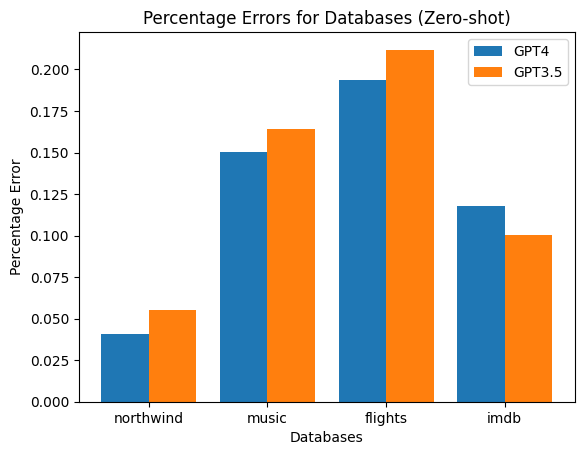

In [19]:
X_axis = np.arange(len(dbs))

plt.bar(X_axis - 0.2, error_lst_4, 0.4, label = 'GPT4')
plt.bar(X_axis + 0.2, error_lst_3, 0.4, label = 'GPT3.5')

plt.xticks(X_axis, dbs)
plt.xlabel("Databases")
plt.ylabel("Percentage Error")
plt.title("Percentage Errors for Databases (Zero-shot)")
plt.legend()
plt.show()

- Errors for GPT 4 and 3.5 are really similar for each database but errors for GPT 4 is slightly lower
- northwind has the lowest average errors

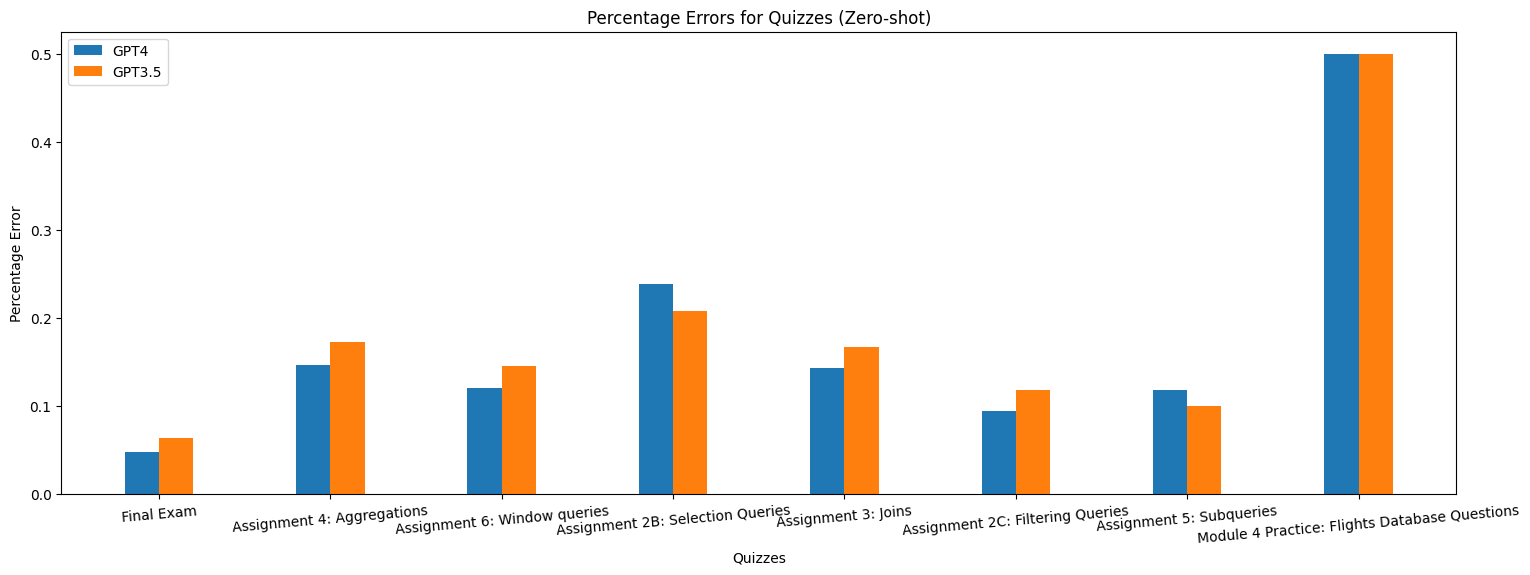

In [30]:
qs = df['HomeWork'].unique()
error_lst_4 = []
error_lst_3 = []
for q in qs:
  temp = df[df['HomeWork']==q]
  error_lst_4.append(temp['4_0_error'].mean())
  error_lst_3.append(temp['3_0_error'].mean())

X_axis = np.arange(len(qs))

plt.figure(figsize=(18,6))
plt.bar(X_axis - 0.1, error_lst_4, 0.2, label = 'GPT4')
plt.bar(X_axis + 0.1, error_lst_3, 0.2, label = 'GPT3.5')

plt.xticks(X_axis, qs, rotation=5)
plt.xlabel("Quizzes")
plt.ylabel("Percentage Error")
plt.title("Percentage Errors for Quizzes (Zero-shot)")
plt.legend()
plt.show()

- GPT 4 errors are generally lower than GPT 3 errors across quizzes
- Final Exam has the lowest average percentage errors

## Jointplots
https://seaborn.pydata.org/generated/seaborn.jointplot.html

<ipython-input-46-cd4738ee052b>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  j.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))


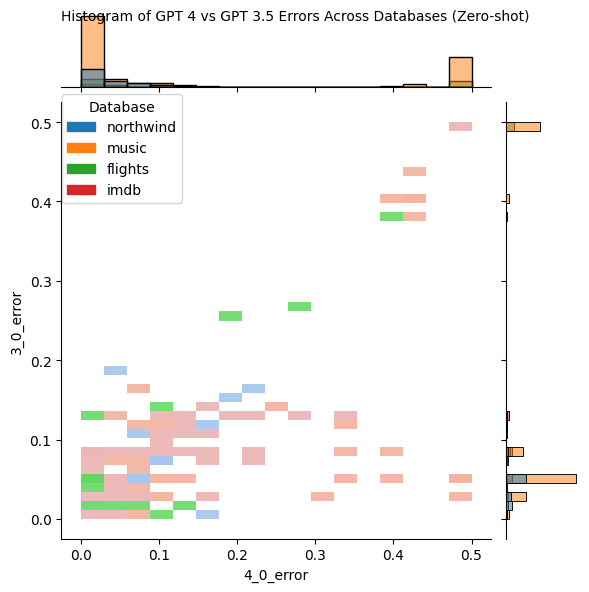

In [46]:
j = sns.jointplot(data=df, x="4_0_error", y="3_0_error", hue="Database", kind='hist')
j.fig.suptitle("Histogram of GPT 4 vs GPT 3.5 Errors Across Databases (Zero-shot)", fontsize=10)
leg = j.ax_joint.get_legend()
leg.remove()
# Add the legend to the figure with adjusted position
j.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.show()

- Hist easier to interpret
- The hardest database to grade is imdb for both GPT models.
- Northwind and flights is harder to grade for GPT 3.5, music is harder to grade for GPT 4.
- Most errors aggregated below 0.2, with northwind and flights aggregated

<ipython-input-48-4f415c7a2910>:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  g.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))


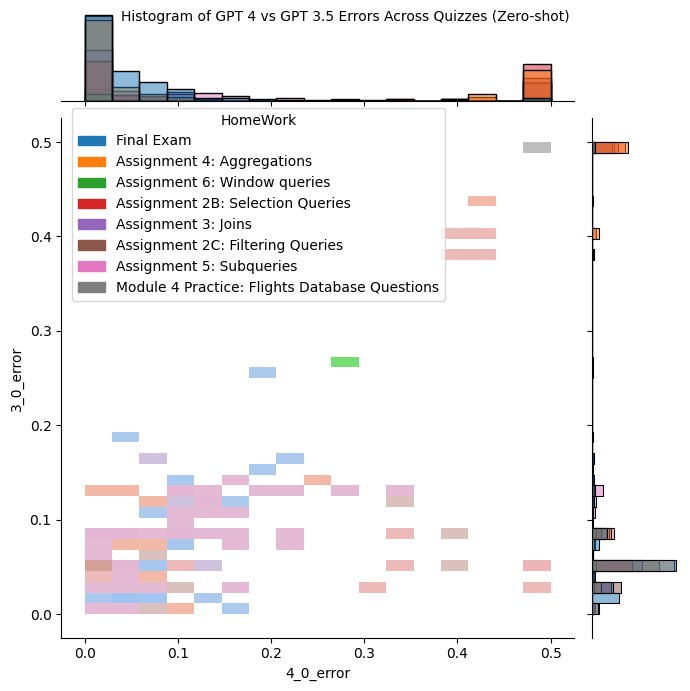

In [48]:
g = sns.jointplot(data=df, x="4_0_error", y="3_0_error", hue="HomeWork", kind='hist', height=7)
g.fig.suptitle("Histogram of GPT 4 vs GPT 3.5 Errors Across Quizzes (Zero-shot)", fontsize=10)
# plt.tight_layout()
leg = g.ax_joint.get_legend()
leg.remove()
# Add the legend to the figure with adjusted position
g.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.show()

- Further decompose each database to quizzes
- Also comes to Assignment 2B and Module 4 being the hardest one, especially for GPT 4.
- Other quizzes spread out from 0 to 0.2

#### Lots of grades near 0 because there are 500 questions with full_score=1

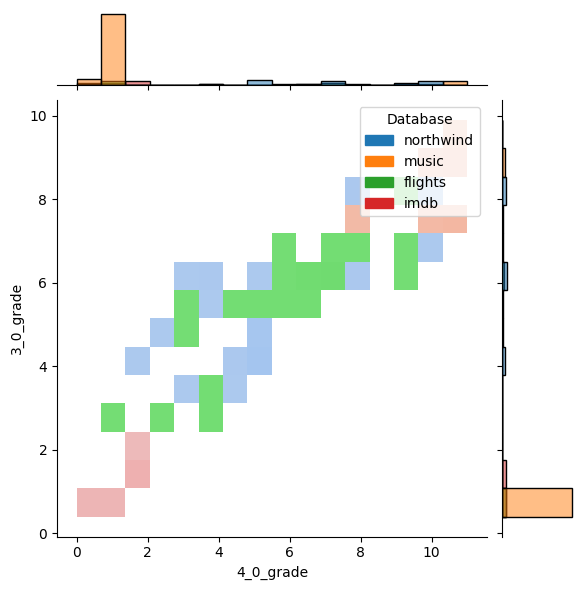

In [49]:
sns.jointplot(data=df, x="4_0_grade", y="3_0_grade", hue='Database', kind='hist')

## Few-shot Evaluation

In [54]:
fs = gcsfs.GCSFileSystem(project="sql_autograding")
with fs.open("gs://sql_autograding/few_shots_completions_final.csv") as f:
    data = pd.read_csv(f)

In [55]:
data = data.drop(columns='Unnamed: 0')
data.head()

,QuestionID,SubmittedAnswer,StudentID,Score,HomeWork,Question,Database,AnswerKey,schema,full_score,4_few_mp,num,4_answer,4_grade,4_feedback,3_few_mp,3_answer,3_grade,3_feedback
0,63,"SELECT FirstName, LastName, HireDate FROM Emp...",amc10323,5.0,Final Exam,"We would like to see just the FirstName, LastN...",northwind,"SELECT FirstName, LastName, HireDate FROM Empl...","[{'Categories': ['CategoryID', 'CategoryName',...",5.0,\n a. We are working with the northwind d...,2437,Grade: 10/10\n\nFeedback: Excellent job! Your ...,10,Excellent job! Your SQL query is correct and i...,\n a. We are working with the northwind d...,Grade: 9/10\n\nFeedback: \nGreat job on correc...,9.0,\nGreat job on correctly identifying the table...
1,16,"select T.track_name, A.artist_name, AL.album_n...",jd2855,0.0,Assignment 3: Joins,"List all the track names, the corresponding al...",music,"SELECT track_name, artist_name, album_name FRO...","[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music datab...,2730,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query correctly joins the ...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query joins the tables corre...
2,3,SELECT * FROM album;,mc10018,0.0,Assignment 2B: Selection Queries,Show all the albums.,music,SELECT * FROM album,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music datab...,2091,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query is correct and it wi...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN
3,0,Select artist_name from artist order by arti...,lka2053,0.0,Assignment 2B: Selection Queries,"List all the names of the artists, without the...",music,SELECT artist_name FROM artist ORDER BY artist...,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,\n a. We are working with the music datab...,2519,Grade: 10/10\n\nFeedback: Your answer is corre...,10,Your answer is correct. You have successfully ...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN
4,24,"use music; SELECT A.artist_id, COUNT(B.album_...",sf4210,0.0,Assignment 4: Aggregations,"For each artist, count the number of albums in...",music,"SELECT artist_id, COUNT(album_id) AS cnt_album...","[{'album': ['artist_id', 'album_id', 'album_na...",11.0,\n a. We are working with the music datab...,2456,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query correctly counts the...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query is correct and produce...


In [56]:
data['4_grade'].value_counts()

10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         275
9                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [57]:
data['3_grade'].value_counts()

8.0     144
9.0     105
7.0      96
6.0      17
10.0      9
8.5       7
7.5       6
4.0       5
2.0       4
1.0       3
6.5       2
5.0       1
3.0       1
Name: 3_grade, dtype: int64

In [58]:
def extract_grade_feedback(text):
    # Split the text into two parts: before and after "\n\nFeedback:"
    parts = text.split('\n\nFeedback:')

    # Extract the score and feedback
    grade = parts[0].strip()
    feedback = parts[1].strip() if len(parts) > 1 else ''

    return grade, feedback

In [59]:
for i,r in data.iterrows():
  if is_float(r['4_grade'])==False:
    g,f = extract_grade_feedback(r['4_grade'])
    data.at[i,'4_grade'] = g
    data.at[i,'4_feedback'] = f

In [60]:
data['4_grade'].value_counts()

10     286
9       28
7       21
8       14
2       10
7.5      9
9.5      8
5        8
0        7
3        3
6        2
8.5      1
4        1
8.0      1
6.5      1
Name: 4_grade, dtype: int64

In [ ]:
# def parse4(text):
#   grade = 0
#   f = text.split('.')[0].split(' ')
#   for i,w in enumerate(f):
#     if w == "out" and i > 0:
#       grade = f[i-1]
#       break

#   feedback = text.split('.')[1:]
#   return grade, feedback

In [ ]:
# def parse3(text):
#   grade_start = text.find("Grade: ") + len("Grade: ")
#   grade_end = text.find("/", grade_start)
#   grade = text[grade_start:grade_end]

#   feedback_start = text.find("Feedback: ") + len("Feedback: ")
#   feedback = text[feedback_start:]
#   return grade, feedback


In [ ]:
# for i,r in data.iterrows():
#   if is_float(r['4_0_grade'])==False:
#     g,f = parse4(r['4_0_answer'])
#     data.at[i,'4_0_grade'] = g
#     data.at[i,'4_0_feedback'] = f
#   elif is_float(r['3_0_grade'])==False:
#     g,f = parse3(r['3_0_answer'])
#     data.at[i,'3_0_grade'] = g
#     data.at[i,'3_0_feedback'] = f

In [61]:
def scale_score(gpt_score, full_score):
  if str(gpt_score).endswith("/10") or str(gpt_score).endswith("/10.0") or str(gpt_score).endswith("/2.0") or str(gpt_score).endswith("/11.0") or str(gpt_score).endswith("/1.0"):
    numerator, denominator = map(float, gpt_score.split('/'))
    g = float(numerator)/float(denominator)
    return g*full_score
  else:
    return (float(gpt_score)*full_score)/10

In [62]:
lst4 = []
lst3 = []
for i, r in data.iterrows():
  grade4 = scale_score(r['4_grade'], r['full_score'])
  grade3 = scale_score(r['3_grade'], r['full_score'])
  lst4.append(grade4)
  lst3.append(grade3)

data['4_grade_scaled'] = lst4
data['3_grade_scaled'] = lst3

data.head()

,QuestionID,SubmittedAnswer,StudentID,Score,HomeWork,Question,Database,AnswerKey,schema,full_score,...,num,4_answer,4_grade,4_feedback,3_few_mp,3_answer,3_grade,3_feedback,4_grade_scaled,3_grade_scaled
0,63,"SELECT FirstName, LastName, HireDate FROM Emp...",amc10323,5.0,Final Exam,"We would like to see just the FirstName, LastN...",northwind,"SELECT FirstName, LastName, HireDate FROM Empl...","[{'Categories': ['CategoryID', 'CategoryName',...",5.0,...,2437,Grade: 10/10\n\nFeedback: Excellent job! Your ...,10,Excellent job! Your SQL query is correct and i...,\n a. We are working with the northwind d...,Grade: 9/10\n\nFeedback: \nGreat job on correc...,9.0,\nGreat job on correctly identifying the table...,5.0,4.5
1,16,"select T.track_name, A.artist_name, AL.album_n...",jd2855,0.0,Assignment 3: Joins,"List all the track names, the corresponding al...",music,"SELECT track_name, artist_name, album_name FRO...","[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,2730,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query correctly joins the ...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query joins the tables corre...,1.0,0.7
2,3,SELECT * FROM album;,mc10018,0.0,Assignment 2B: Selection Queries,Show all the albums.,music,SELECT * FROM album,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,2091,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query is correct and it wi...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN,1.0,0.8
3,0,Select artist_name from artist order by arti...,lka2053,0.0,Assignment 2B: Selection Queries,"List all the names of the artists, without the...",music,SELECT artist_name FROM artist ORDER BY artist...,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,2519,Grade: 10/10\n\nFeedback: Your answer is corre...,10,Your answer is correct. You have successfully ...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN,1.0,0.8
4,24,"use music; SELECT A.artist_id, COUNT(B.album_...",sf4210,0.0,Assignment 4: Aggregations,"For each artist, count the number of albums in...",music,"SELECT artist_id, COUNT(album_id) AS cnt_album...","[{'album': ['artist_id', 'album_id', 'album_na...",11.0,...,2456,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query correctly counts the...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query is correct and produce...,11.0,7.7


In [ ]:
data.to_csv('few_shots_cleaned_final.csv')

In [63]:
data['4_error'] = ((data['Score'] - data['4_grade_scaled']).abs() / (data['Score']+data['4_grade_scaled'])/2)
data['3_error'] = ((data['Score'] - data['3_grade_scaled']).abs() / (data['Score']+data['3_grade_scaled'])/2)
# .map('{:.2%}'.format)
data.head()

,QuestionID,SubmittedAnswer,StudentID,Score,HomeWork,Question,Database,AnswerKey,schema,full_score,...,4_grade,4_feedback,3_few_mp,3_answer,3_grade,3_feedback,4_grade_scaled,3_grade_scaled,4_error,3_error
0,63,"SELECT FirstName, LastName, HireDate FROM Emp...",amc10323,5.0,Final Exam,"We would like to see just the FirstName, LastN...",northwind,"SELECT FirstName, LastName, HireDate FROM Empl...","[{'Categories': ['CategoryID', 'CategoryName',...",5.0,...,10,Excellent job! Your SQL query is correct and i...,\n a. We are working with the northwind d...,Grade: 9/10\n\nFeedback: \nGreat job on correc...,9.0,\nGreat job on correctly identifying the table...,5.0,4.5,0.0,0.026316
1,16,"select T.track_name, A.artist_name, AL.album_n...",jd2855,0.0,Assignment 3: Joins,"List all the track names, the corresponding al...",music,"SELECT track_name, artist_name, album_name FRO...","[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,10,Great job! Your SQL query correctly joins the ...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query joins the tables corre...,1.0,0.7,0.5,0.500000
2,3,SELECT * FROM album;,mc10018,0.0,Assignment 2B: Selection Queries,Show all the albums.,music,SELECT * FROM album,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,10,Great job! Your SQL query is correct and it wi...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN,1.0,0.8,0.5,0.500000
3,0,Select artist_name from artist order by arti...,lka2053,0.0,Assignment 2B: Selection Queries,"List all the names of the artists, without the...",music,SELECT artist_name FROM artist ORDER BY artist...,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,10,Your answer is correct. You have successfully ...,\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback:\n- The student's answ...,8.0,NaN,1.0,0.8,0.5,0.500000
4,24,"use music; SELECT A.artist_id, COUNT(B.album_...",sf4210,0.0,Assignment 4: Aggregations,"For each artist, count the number of albums in...",music,"SELECT artist_id, COUNT(album_id) AS cnt_album...","[{'album': ['artist_id', 'album_id', 'album_na...",11.0,...,10,Great job! Your SQL query correctly counts the...,\n a. We are working with the music datab...,Grade: 7/10\n\nFeedback: \n- The student's que...,7.0,\n- The student's query is correct and produce...,11.0,7.7,0.5,0.500000


In [64]:
data[['4_error', '3_error']].describe()

,4_error,3_error
count,396.000000,400.000000
mean,0.130655,0.142789
std,0.198234,0.184823
min,0.000000,0.000000
25%,0.000000,0.026316
50%,0.006410,0.055556
75%,0.166667,0.088235
max,0.500000,0.500000


In [67]:
data.sort_values(by='4_error', ascending=False).head()

,QuestionID,SubmittedAnswer,StudentID,Score,HomeWork,Question,Database,AnswerKey,schema,full_score,...,4_grade,4_feedback,3_few_mp,3_answer,3_grade,3_feedback,4_grade_scaled,3_grade_scaled,4_error,3_error
199,99,"SELECT origin,dest, count(distinct carrier) a...",ms13855,0.0,Module 4 Practice: Flights Database Questions,"For each origin airport, list the number of ca...",flights,"SELECT origin , COUNT(DISTINCT dest) AS destin...","[{'airports': ['airport', 'state', 'state_name...",1.0,...,2,Your answer does not meet the requirements of ...,\n a. We are working with the flights dat...,Grade: 4/10\n\nFeedback:\n- The student's quer...,4.0,NaN,0.2,0.4,0.5,0.500000
117,18,"SELECT U.first_name, U.last_name FROM users U...",sl11045,0.0,Assignment 3: Joins,List the first and last names of the users tha...,music,"SELECT U.first_name, U.last_name FROM users U ...","[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,9,"Your SQL query is almost correct. However, you...",\n a. We are working with the music datab...,Grade: 8/10\n\nFeedback: \n- The student's que...,8.0,\n- The student's query is correct and returns...,0.9,0.8,0.5,0.500000
323,6,SELECT * FROM track;,fam7,0.0,Assignment 2B: Selection Queries,Show all the tracks.,music,SELECT * FROM track,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,10,Great job! Your SQL query is correct and it su...,\n a. We are working with the music datab...,Grade: 9/10\n\nFeedback: \nGreat job on the qu...,9.0,\nGreat job on the query! Your answer is corre...,1.0,0.9,0.5,0.500000
153,13,"'5','The Stone Roses'",apw5103,1.0,Assignment 2C: Filtering Queries,Show the entry for the artist with id equal to 5.,music,SELECT * FROM artist WHERE artist_id = 5,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,0,Your answer is incorrect. The task was to writ...,\n a. We are working with the music datab...,Grade: 9/10\n\nFeedback: \nGreat job! Your ans...,9.0,\nGreat job! Your answer is correct and matche...,0.0,0.9,0.5,0.026316
152,11,Using IN operation: select * from track wher...,sp7387,0.0,Assignment 2C: Filtering Queries,List all the tracts for the artists with ids 1...,music,SELECT * FROM track WHERE artist_id = 1 OR art...,"[{'album': ['artist_id', 'album_id', 'album_na...",1.0,...,10,Excellent job! Your SQL queries are correct an...,\n a. We are working with the music datab...,Grade: 9/10\n\nFeedback: \nGreat job on provid...,9.0,\nGreat job on providing two variations of the...,1.0,0.9,0.5,0.500000


### Errors among Databases

[0.043865217152853415, 0.14756714916833688, 0.17293643796397534, 0.11434564440528948]
[0.04322714602561705, 0.1689049616493543, 0.18784028054528618, 0.071305615198131]


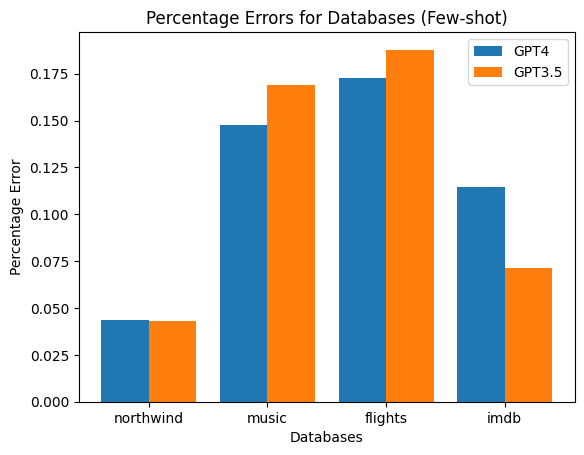

In [69]:
dbs = data['Database'].unique()
error_lst_4 = []
error_lst_3 = []
for db in dbs:
  temp = data[data['Database']==db]
  error_lst_4.append(temp['4_error'].mean())
  error_lst_3.append(temp['3_error'].mean())
print(error_lst_4)
print(error_lst_3)

X_axis = np.arange(len(dbs))

plt.bar(X_axis - 0.2, error_lst_4, 0.4, label = 'GPT4')
plt.bar(X_axis + 0.2, error_lst_3, 0.4, label = 'GPT3.5')

plt.xticks(X_axis, dbs)
plt.xlabel("Databases")
plt.ylabel("Percentage Error")
plt.title("Percentage Errors for Databases (Few-shot)")
plt.legend()
plt.show()

- Northwind also has a lowest average percentage error among databases.
- GPT 4 has more errors for northwind and imdb but slightly lower errors for other databases than GPT 3.5.

### Errors among Quizzes

[0.040215815271279515, 0.17334277671932471, 0.21069206660021933, 0.11244440380877667, 0.11434564440528948, 0.12229253233712362, 0.06326530612244897, 0.5]
[0.04523558334247169, 0.20565349921645074, 0.21633431108437085, 0.14323207702087767, 0.071305615198131, 0.13477970715968038, 0.0819588294157069, 0.5]


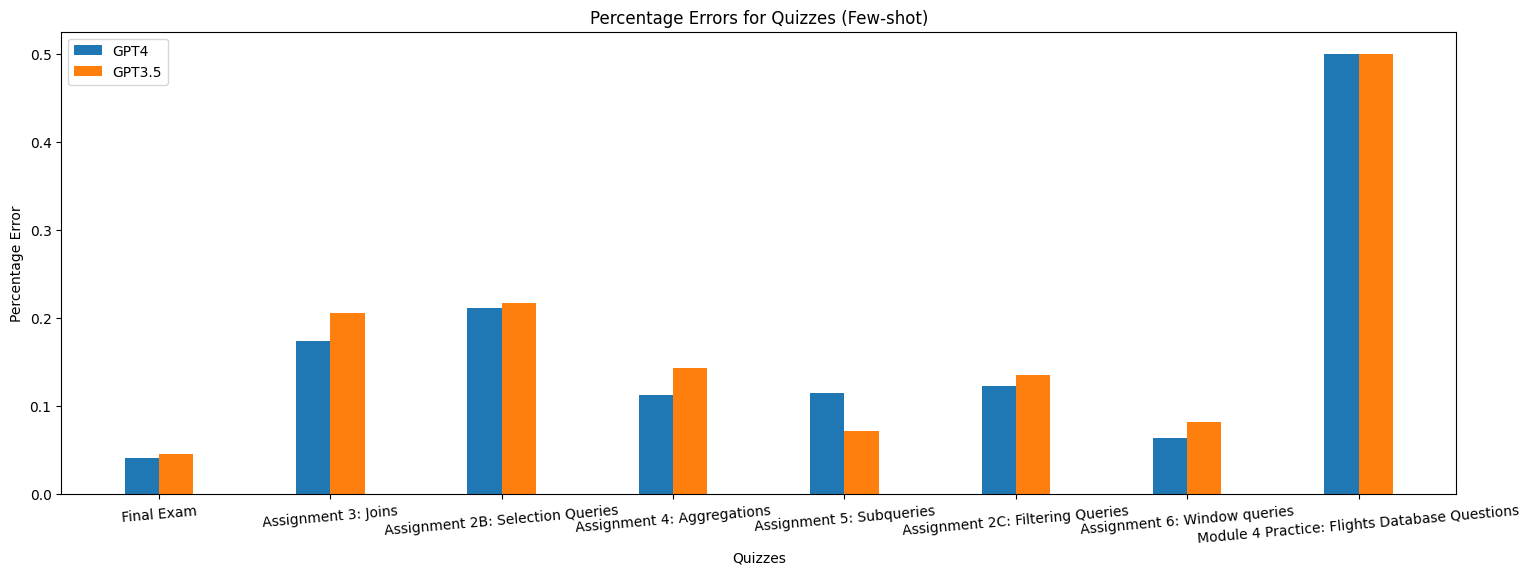

In [71]:
qs = data['HomeWork'].unique()
error_lst_4 = []
error_lst_3 = []
for q in qs:
  temp = data[data['HomeWork']==q]
  error_lst_4.append(temp['4_error'].mean())
  error_lst_3.append(temp['3_error'].mean())
print(error_lst_4)
print(error_lst_3)

X_axis = np.arange(len(qs))

plt.figure(figsize=(18,6))
plt.bar(X_axis - 0.1, error_lst_4, 0.2, label = 'GPT4')
plt.bar(X_axis + 0.1, error_lst_3, 0.2, label = 'GPT3.5')

plt.xticks(X_axis, qs, rotation=5)
plt.xlabel("Quizzes")
plt.ylabel("Percentage Error")
plt.title("Percentage Errors for Quizzes (Few-shot)")
plt.legend()
plt.show()

- Module 4 Practice has a largest average error across quizzes, while final exam has a smallest average error.
- GPT 4 has slightly smaller errors than GPT 3.5.


<ipython-input-72-f6739d7d81d0>:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  j.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))


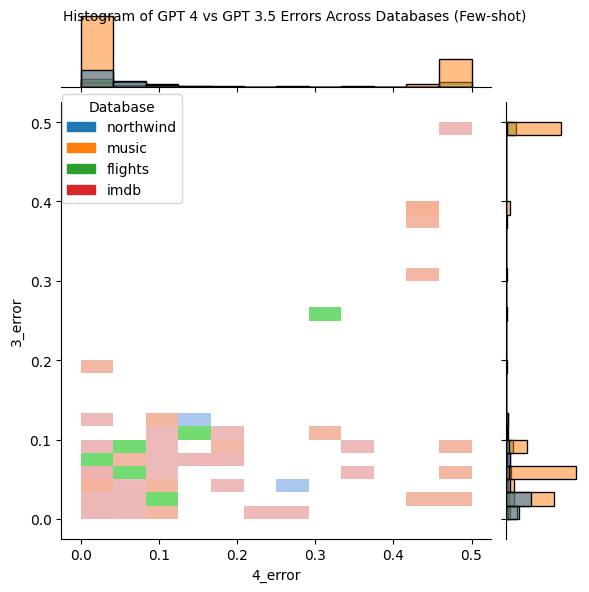

In [72]:
j = sns.jointplot(data=data, x="4_error", y="3_error", hue="Database", kind='hist')
j.fig.suptitle("Histogram of GPT 4 vs GPT 3.5 Errors Across Databases (Few-shot)", fontsize=10)
leg = j.ax_joint.get_legend()
leg.remove()
j.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))
plt.show()

- Music has the maximum errors, dispersed loosely from 0 to 0.5, also harder to grade for GPT 4.

<ipython-input-73-27052adfae44>:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  g.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))


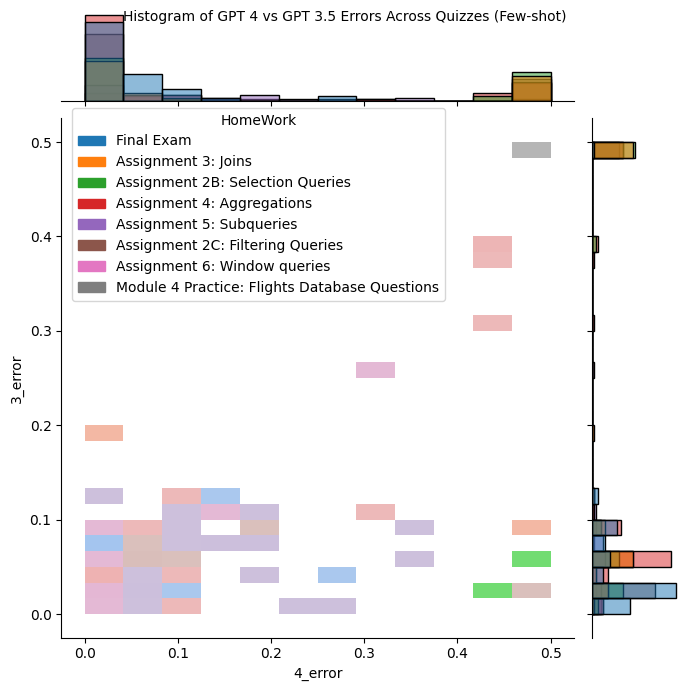

In [73]:
g = sns.jointplot(data=data, x="4_error", y="3_error", hue="HomeWork", kind='hist', height=7)
g.fig.suptitle("Histogram of GPT 4 vs GPT 3.5 Errors Across Quizzes (Few-shot)", fontsize=10)
leg = g.ax_joint.get_legend()
leg.remove()
g.fig.legend(handles=leg.legendHandles, labels=[text.get_text() for text in leg.texts], title=leg.get_title().get_text(), loc='upper left', bbox_to_anchor=(0.1, 0.85))
# plt.tight_layout()
plt.show()

- Multiple quizzes have the largest error and the errors are more spread out for GPT 4.